In [103]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

In [104]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# importing the 'Lead' Dataset

In [105]:
df = pd.read_csv('Leads.csv')

In [106]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [108]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [109]:
#creating the DF for the purpose of analysis and removing the 'ID' and 'Lead number' column which are unique to each candidate
lead=df.drop(['Prospect ID','Lead Number'],axis=1)

# Step 1 : Data Cleaning

In [110]:
#checking missing value percentage

lead.isnull().mean().sort_values(ascending=False)*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [111]:
#There are some categorical columns where the values are 'Select', these are the default values which can be considered as missing values.
#converting all the columns with 'Select' categorical values into nan

for i in lead.columns:
    lead[i]=lead[i].replace('Select',np.nan)

In [112]:
#we can see that the missing values are increasing after the above step

lead.isnull().mean().sort_values(ascending=False)*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [113]:
#removing the columns with missing values more than 40%
drop_cols = lead.columns[100*lead.isnull().mean()>40]
drop_cols

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [114]:
lead.drop(drop_cols,axis=1,inplace=True)

In [115]:
lead.shape

(9240, 28)

In [116]:
lead.isnull().mean().sort_values(ascending=False)*100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [117]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    lead[feature] = lead[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,NaN,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [118]:
#for categorical variable imputing with mode value
for i in ['Lead Source','Last Activity']:
    lead[i]=lead[i].fillna(lead[i].mode()[0])
    

In [119]:
#for numerical variable imputing with median value
for i in ['Page Views Per Visit','TotalVisits']:
    lead[i]=lead[i].fillna(int(lead[i].median()))

In [120]:
lead.isnull().mean().sort_values(ascending=False)*100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Lead Origin                                       0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Magazine                                          0.0000

In [121]:
#imputing the missing values in above columns with 'missing' value
cols = ['City','Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country']
for i in cols:
    lead[i].fillna('Missing',inplace=True)

# Since the course is online, Country and city column won't be of any use in the analysis, hence dropping them

In [122]:
# Since the course is online, Country and city column won't be of any use in the analysis, hence dropping them

lead.drop(['Country','City'],axis=1,inplace=True)

In [123]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,0,Modified


# Checking for outliers

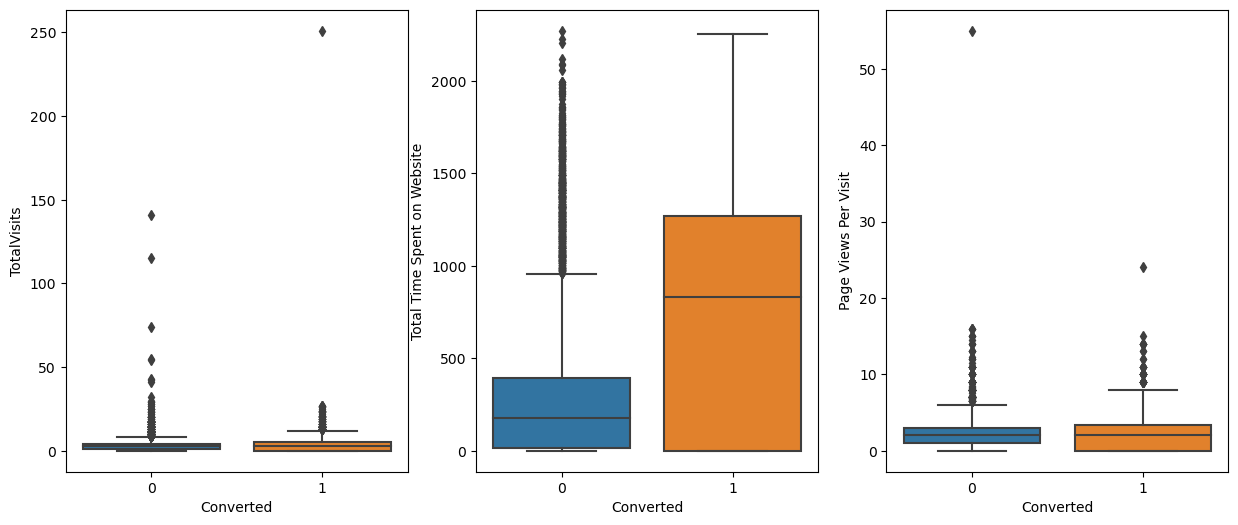

In [124]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y =lead["TotalVisits"],x= lead['Converted']);
plt.subplot(1,3,2)
sns.boxplot(y=lead["Total Time Spent on Website"],x= lead['Converted']);
plt.subplot(1,3,3)
sns.boxplot(y =lead["Page Views Per Visit"],x= lead['Converted']);


In [125]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 99 percetile 

q1 = lead["TotalVisits"].quantile(0.99)
lead["TotalVisits"][lead["TotalVisits"] >= q1] = int(q1)

In [126]:
#capping the outliers in the Page Views per visit:

q1 = lead["Page Views Per Visit"].quantile(0.99)
lead["Page Views Per Visit"][lead["Page Views Per Visit"] >= q1] = int(q1)

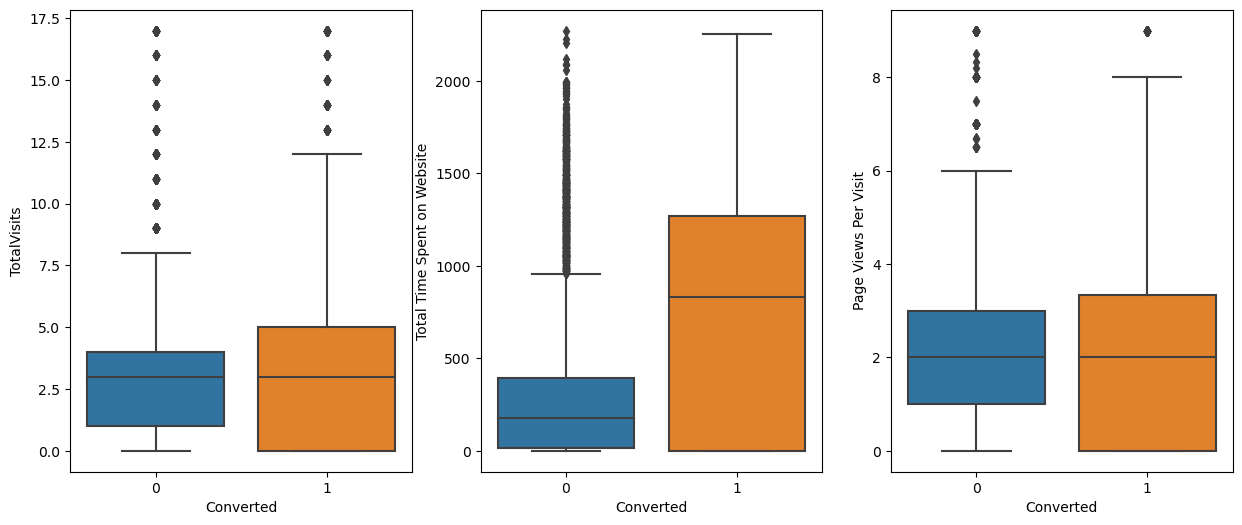

In [127]:
# checking for outliers after capping the values:

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y =lead["TotalVisits"],x= lead['Converted']);
plt.subplot(1,3,2)
sns.boxplot(y=lead["Total Time Spent on Website"],x= lead['Converted']);
plt.subplot(1,3,3)
sns.boxplot(y =lead["Page Views Per Visit"],x= lead['Converted']);

# combining the non significant, less frequent values in the categorical columns into one group


In [128]:
#creating a list of categorical columns with more than two unique values

cols =[]
for i in lead.columns:
    if (lead[i].nunique()>2):
        cols.append(i)
cols

['Lead Origin',
 'Lead Source',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Last Notable Activity']

In [129]:
lead['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [130]:
lead['Lead Origin']=np.where(lead['Lead Origin'].isin(['Landing Page Submission','API','Lead Add Form']),lead['Lead Origin'],'Lead_Origin_Others')
lead['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead_Origin_Others          0.606061
Name: Lead Origin, dtype: float64

In [131]:
lead['Lead Source'].value_counts(normalize=True)*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [132]:
lead['Lead Source']=np.where(lead['Lead Source'].isin(['Google', 'Direct Traffic','Olark Chat','Organic Search', 'Referral Sites','Reference','Welingak Website']),lead['Lead Source'],'Lead_Source_Others')
lead['Lead Source'].value_counts(normalize=True)*100

Google                31.428571
Direct Traffic        27.521645
Olark Chat            18.993506
Organic Search        12.489177
Reference              5.779221
Welingak Website       1.536797
Referral Sites         1.352814
Lead_Source_Others     0.898268
Name: Lead Source, dtype: float64

In [133]:
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [134]:
lead['Last Activity']=np.where(lead['Last Activity'].isin(['Email Bounced','Email Link Clicked','Email Opened', 'SMS Sent','Olark Chat Conversation','Page Visited on Website','Converted to Lead']),lead['Last Activity'],'Last_Activity_Others')
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened               38.311688
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Converted to Lead           4.632035
Email Bounced               3.528139
Last_Activity_Others        3.474026
Email Link Clicked          2.889610
Name: Last Activity, dtype: float64

In [135]:
lead['Specialization'].value_counts(normalize=True)*100

Missing                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [136]:
lead['Specialization']=np.where(lead['Specialization'].isin(['Missing',"Finance Management","Human Resource Management","Marketing Management","Operations Management","Business Administration","IT Projects Management","Supply Chain Management","Banking, Investment And Insurance","Travel and Tourism","Media and Advertising"]),lead['Specialization'],'Specialization_Others')
lead['Specialization'].value_counts(normalize=True)*100

Missing                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Specialization_Others                 9.015152
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
Name: Specialization, dtype: float64

In [137]:
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              60.606061
Missing                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [138]:
lead['What is your current occupation']=np.where(lead['What is your current occupation'].isin(['Unemployed',
'Missing','Student',
'Working Professional']),lead['What is your current occupation'],'Occupation_Others')
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              60.606061
Missing                 29.112554
Working Professional     7.640693
Student                  2.272727
Occupation_Others        0.367965
Name: What is your current occupation, dtype: float64

In [139]:
lead['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      70.649351
Missing                      29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [140]:
lead['What matters most to you in choosing a course']=np.where(lead['What matters most to you in choosing a course'].isin(['Better Career Prospects',
'Missing']),lead['What matters most to you in choosing a course'],'Course_choice_Others')
lead['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects    70.649351
Missing                    29.318182
Course_choice_Others        0.032468
Name: What matters most to you in choosing a course, dtype: float64

In [141]:
lead['Tags'].value_counts(normalize=True)*100

Missing                                              36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [142]:
lead['Tags']=np.where(lead['Tags'].isin([
'Missing',
'Will revert after reading the email',
'Ringing',
'Interested in other courses',
'Already a student',
'Closed by Horizzon',
'switched off',
'Busy','Lost to EINS']),lead['Tags'],'Others')
lead['Tags'].value_counts(normalize=True)*100

Missing                                36.287879
Will revert after reading the email    22.424242
Ringing                                13.019481
Others                                  7.305195
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
switched off                            2.597403
Busy                                    2.012987
Lost to EINS                            1.893939
Name: Tags, dtype: float64

In [143]:
lead['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [144]:
lead['Last Notable Activity']=np.where(lead['Last Notable Activity'].isin([
'Modified',
'Email Opened',
'SMS Sent',
'Page Visited on Website','Olark Chat Conversation','Email Link Clicked']),lead['Last Notable Activity'],'Last_Notable_Activity_Others')
lead['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Last_Notable_Activity_Others     1.731602
Name: Last Notable Activity, dtype: float64

# EDA

In [145]:
#starting with the target variable and see if we have any data imbalance or not 
lead["Converted"].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [146]:
#Current conversion rate

round(lead['Converted'].mean()*100,2)

38.54

**The Current conversion rate is 38.54%**

**We have good representation of both the classes of data and hence we are good to go with the further analysis**

In [147]:
cat_cols=['Do Not Email', 'Do Not Call', 'Search','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview',
       'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Tags',
       'Lead Source', 'Last Activity', 'Lead Origin','Last Notable Activity']

Do Not Email


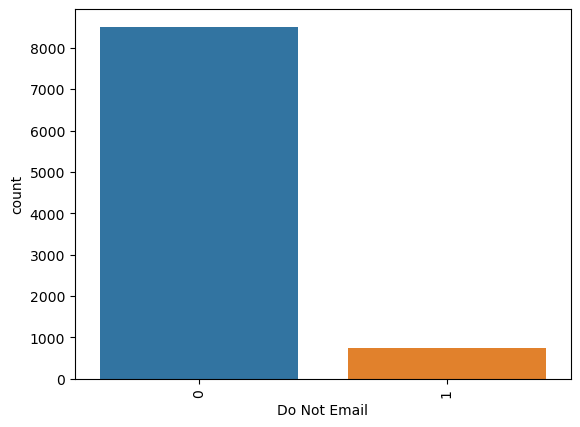

Do Not Call


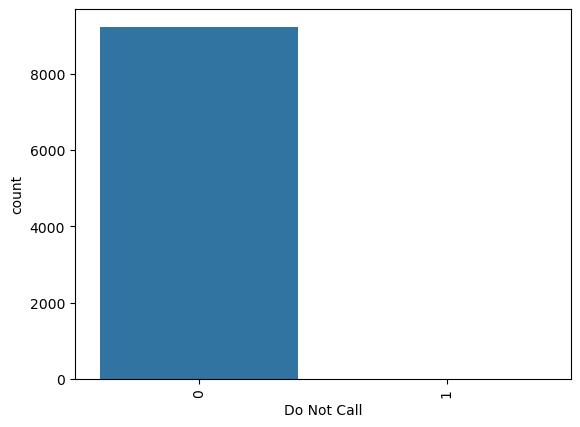

Search


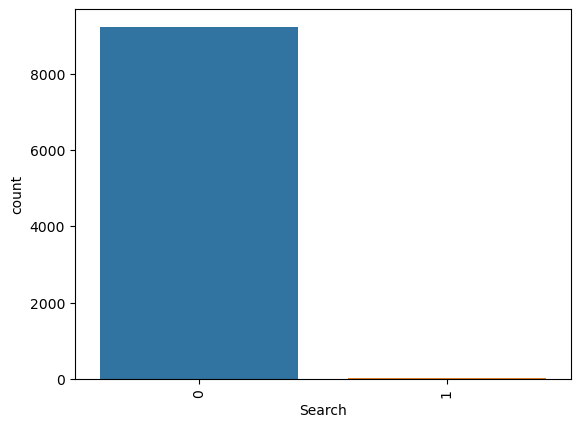

Magazine


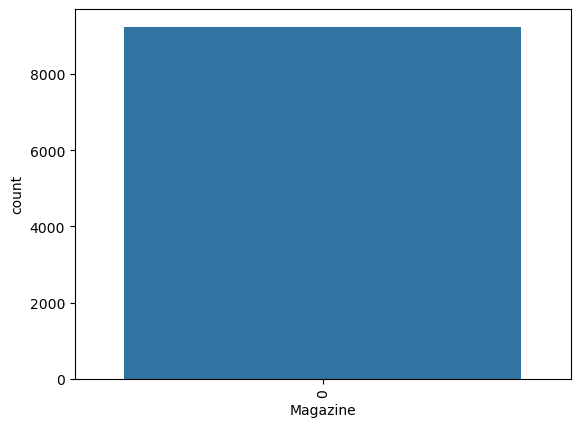

Newspaper Article


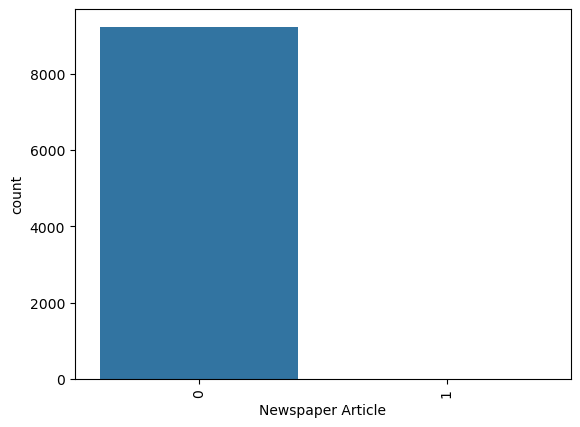

X Education Forums


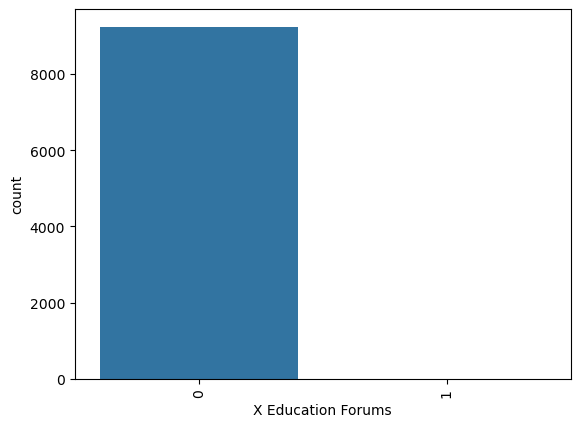

Newspaper


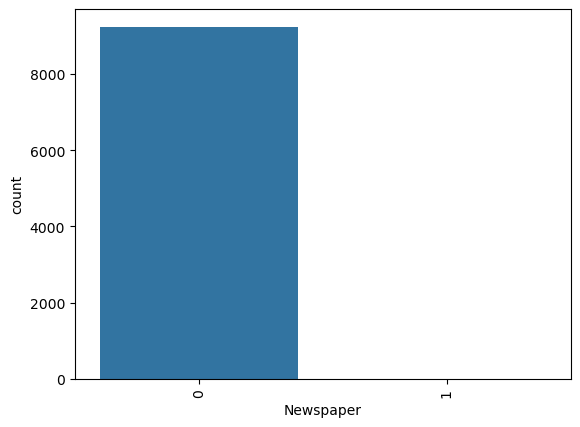

Digital Advertisement


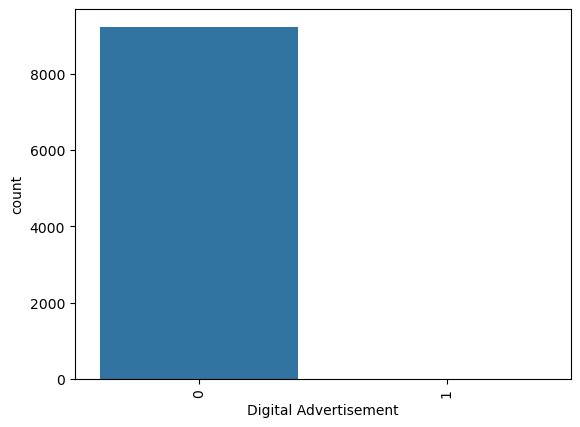

Through Recommendations


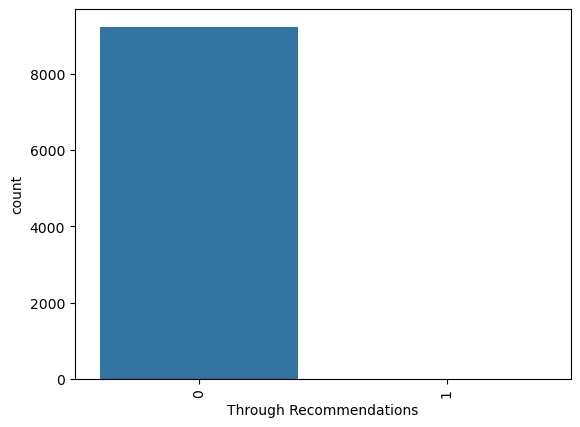

Receive More Updates About Our Courses


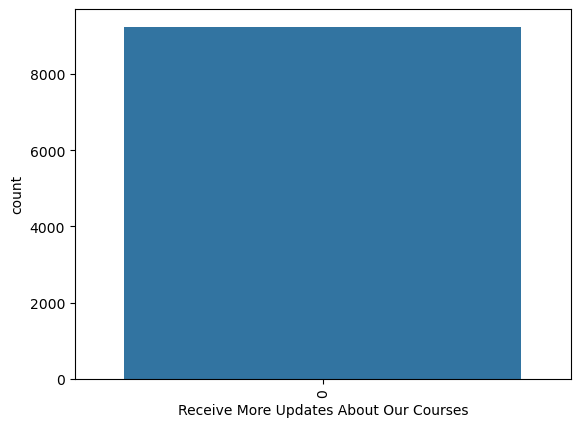

Update me on Supply Chain Content


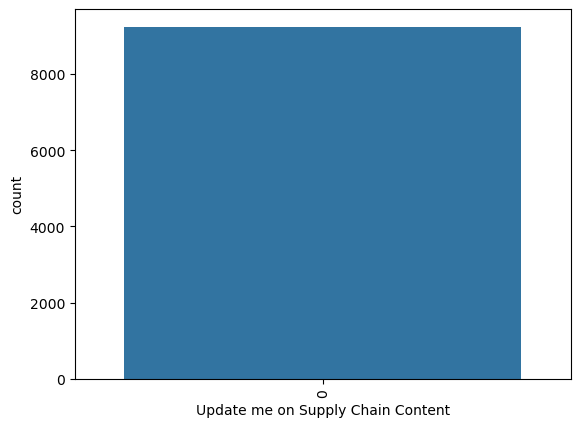

Get updates on DM Content


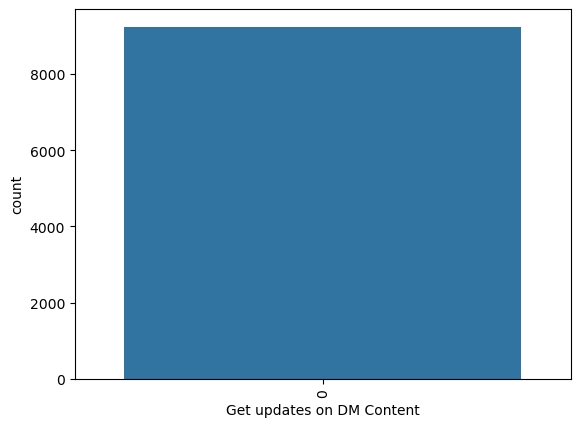

I agree to pay the amount through cheque


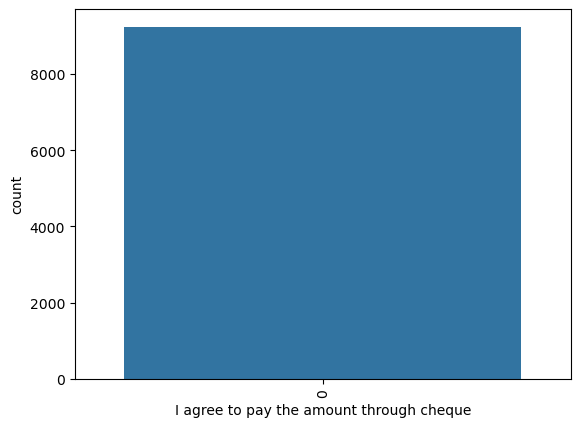

A free copy of Mastering The Interview


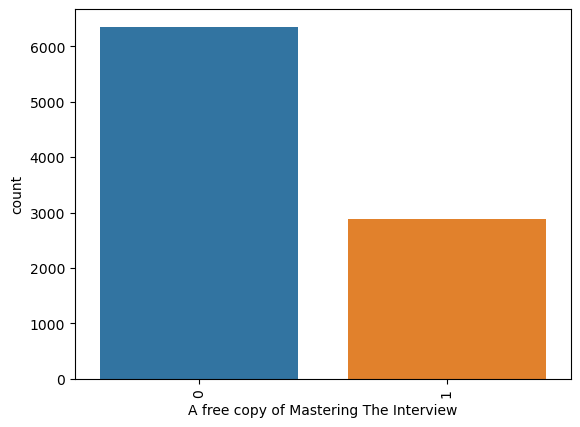

Specialization


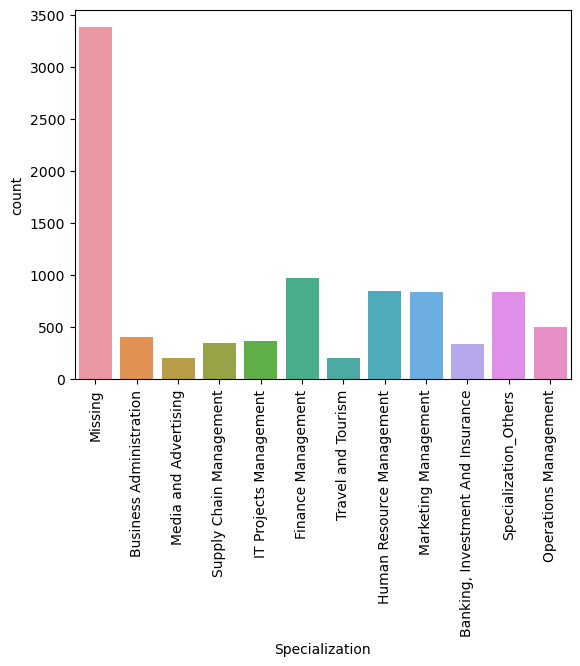

What is your current occupation


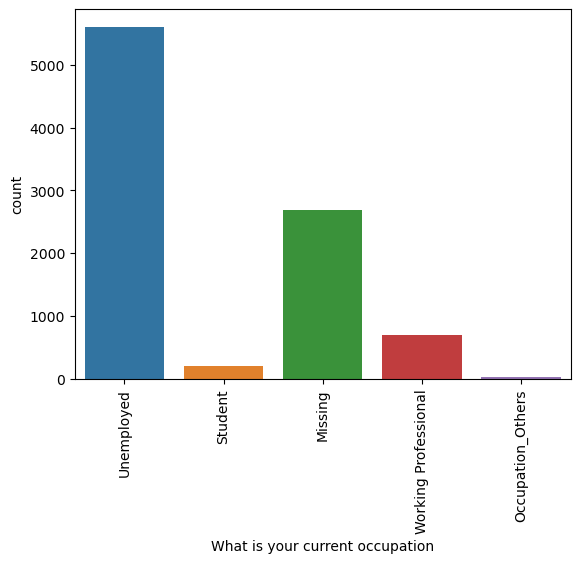

What matters most to you in choosing a course


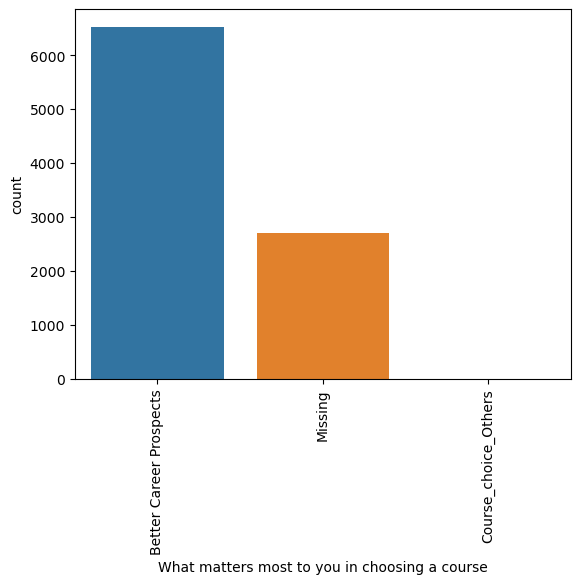

Tags


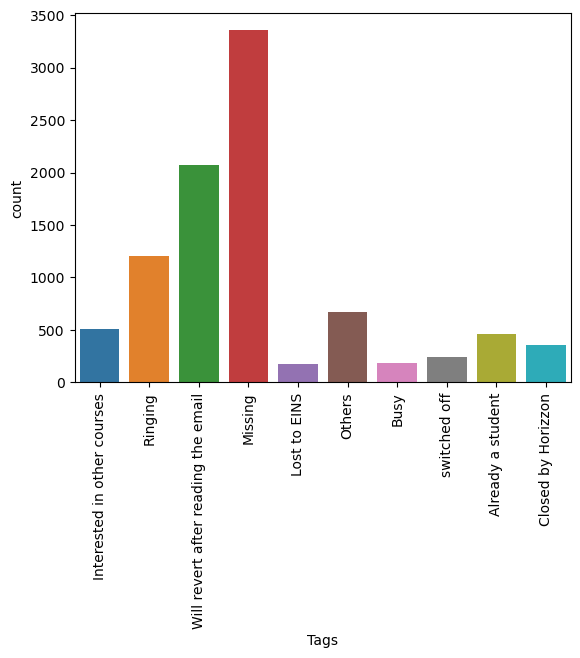

Lead Source


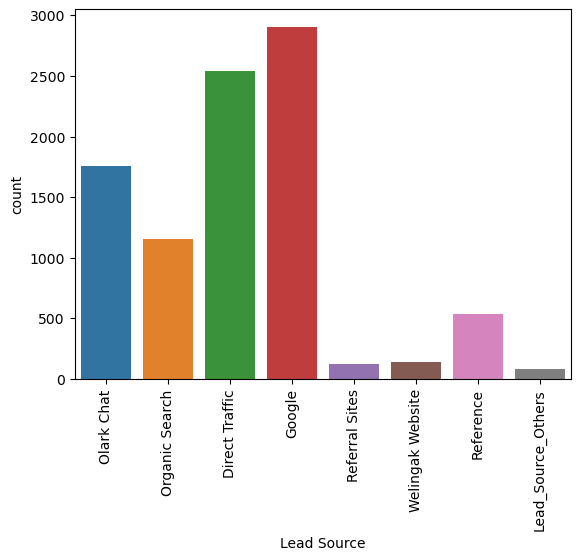

Last Activity


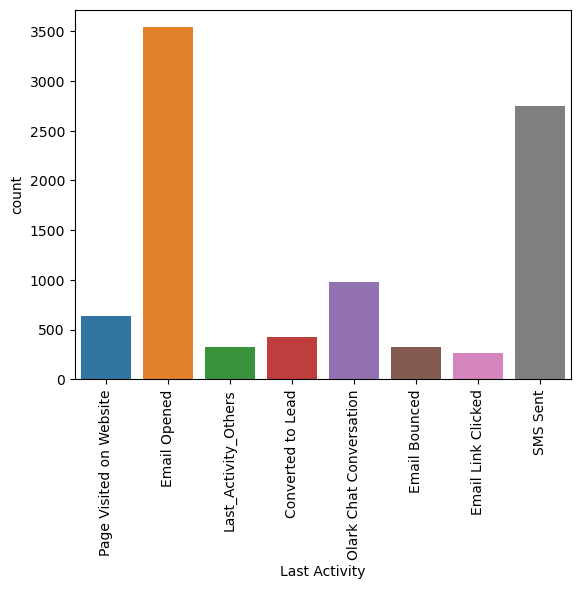

Lead Origin


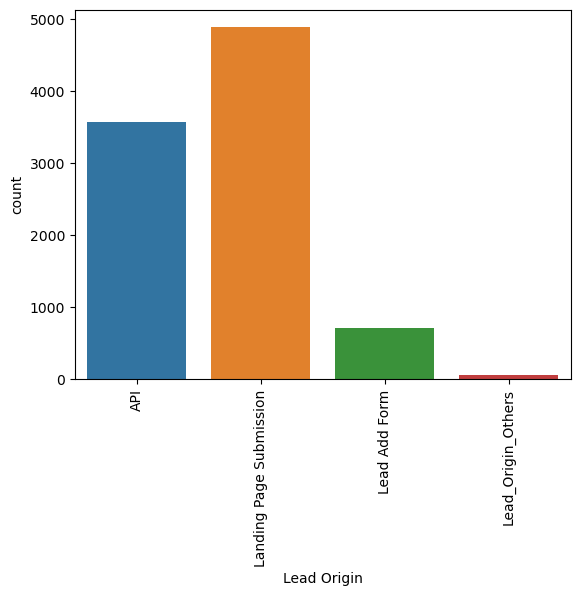

Last Notable Activity


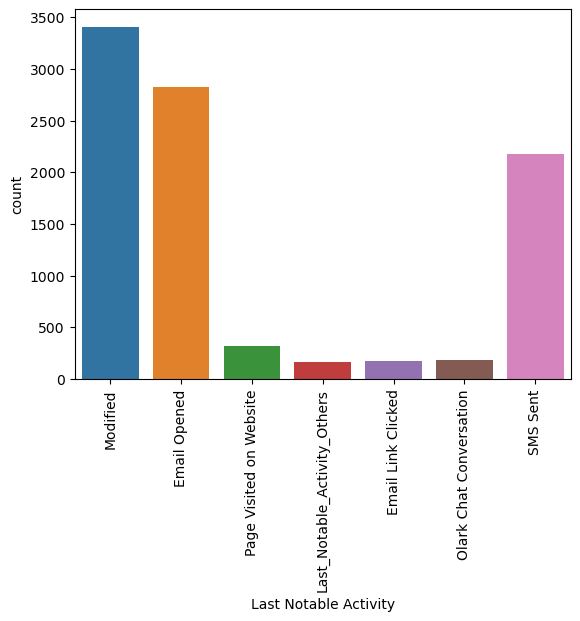

In [148]:
# Univariate analysis of categorical columns
for i in cat_cols:
    print("\033[1m" + i + "\033[0m")
    sns.countplot(x=lead[i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Observation:
   1. for majority of the columns, the response 'No' is very high
   2. Maximum count of city column is unknown followed by Mumbai
   3. Maximum leads/Customers are from India.
   4. Specialization of most of leads/customers are unknown followed by Finance Management
   5. Most of leads/customers are unemployed
   6. Better career prospects is the most popular criteria for leads/customers while choosing a course
   7. Tags of most leads/customers are unknown followed by will revert after reading the email.
   8. Most of the leads source from Google.
   9. Most lead's / customer's last activity is email opened
   10. Most of lead origin from landing page submission
   11. For most of the leads/customer, last notable activity is modified

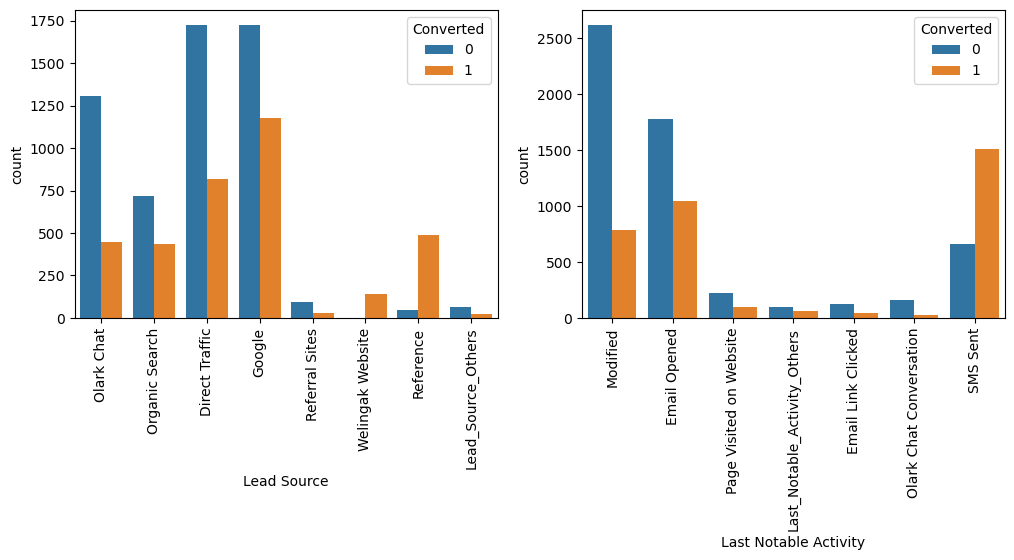

In [149]:
#analysis of the categorical columns

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x=lead['Lead Source'], hue=lead['Converted']);
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sns.countplot(x=lead['Last Notable Activity'], hue=lead['Converted']);
plt.xticks(rotation=90);
plt.subplots_adjust(hspace = 0.75);

Observation: 
1) In Lead Source, Direct traffic and Google has highest weightage, But reference has the highest conversions rate
2) SMS Sent has the good conversion rate, while modified and email opened has higher count value
3) Lead Import has very less count as well as conversion rate and hence can be ignored

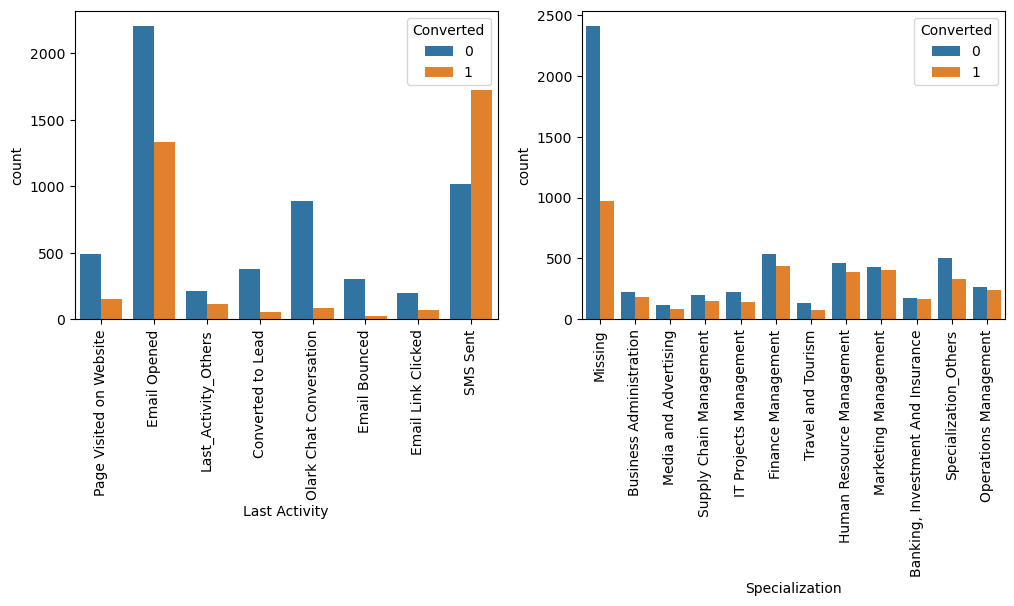

In [150]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x=lead['Last Activity'], hue=lead['Converted']);
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sns.countplot(x=lead['Specialization'], hue=lead['Converted']);
plt.xticks(rotation=90);
plt.subplots_adjust(hspace = 0.75);

Observations : 
   1) In Last Activity Email opened and SMS sent has higher count weightage and SMS Sent has higher conversion rate as well
   2) All the valid specializations have neck to neck conversion rate

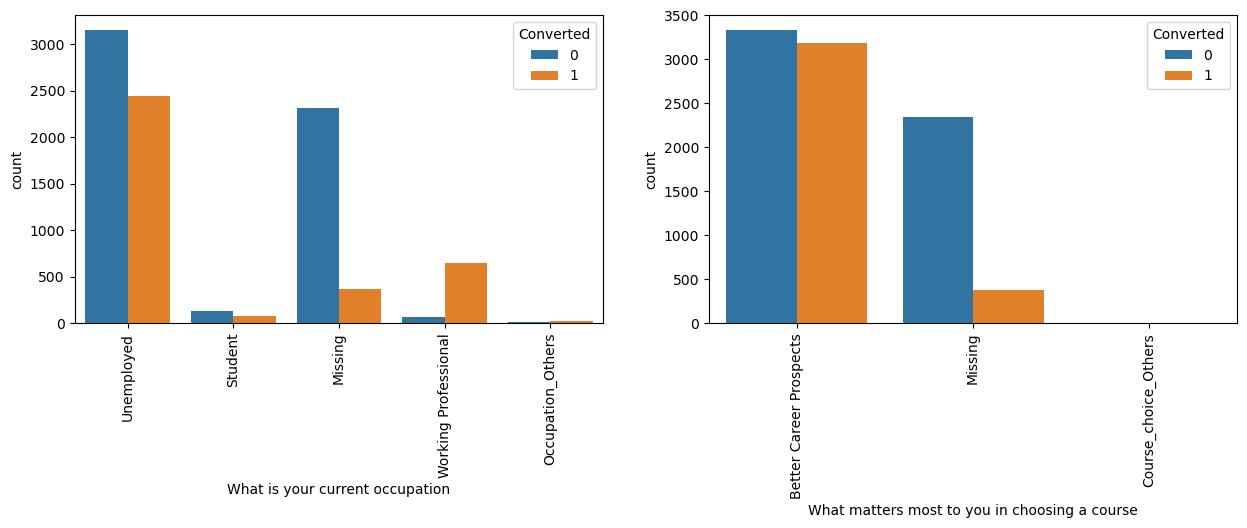

In [151]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x=lead[ 'What is your current occupation'], hue=lead['Converted']);
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sns.countplot(x=lead['What matters most to you in choosing a course'], hue=lead['Converted']);
plt.xticks(rotation=90);
plt.subplots_adjust(hspace = 0.75);

Observations:
   1) Unemployed candidates have highest count, while working professionals have the highest conversion rate
   2) Better career prospects have both higher weightage ~50% conversion rate
   3) mumbai has higher count and Thane and outskirts has better conversion rate

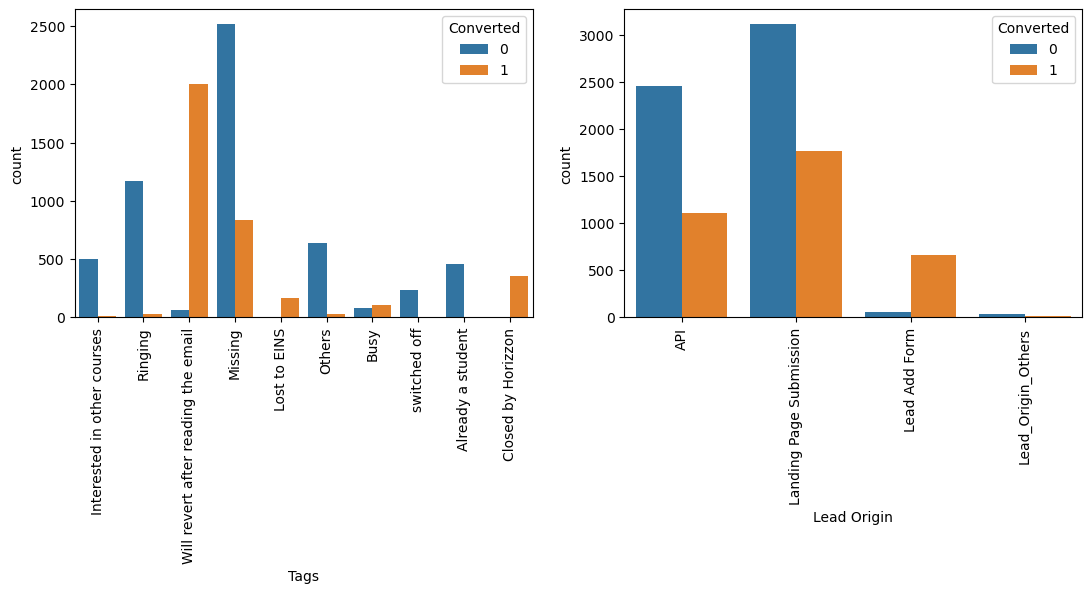

In [152]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(x=lead['Tags'], hue=lead['Converted']);
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sns.countplot(x=lead['Lead Origin'], hue=lead['Converted']);
plt.xticks(rotation=90);
plt.subplots_adjust(hspace = 0.75);

Observation:
   1) revert after reading the email has extremely high conversion rate
   2) In Lead Origin, API and Landing Page Submission has highest weightage in terms of counts, Lead Add Form has the highest conversion rate

In [153]:
# As seen in the above analysis, the given binary column contains highly skewed data
#deleting those binary categorical columns, since they have highly skewed data ( ~ 90%)

binary_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

for i in binary_cols:
    print(lead[i].value_counts(dropna=False, normalize=True)*100)
    



0    92.056277
1     7.943723
Name: Do Not Email, dtype: float64
0    99.978355
1     0.021645
Name: Do Not Call, dtype: float64
0    99.848485
1     0.151515
Name: Search, dtype: float64
0    100.0
Name: Magazine, dtype: float64
0    99.978355
1     0.021645
Name: Newspaper Article, dtype: float64
0    99.989177
1     0.010823
Name: X Education Forums, dtype: float64
0    99.989177
1     0.010823
Name: Newspaper, dtype: float64
0    99.95671
1     0.04329
Name: Digital Advertisement, dtype: float64
0    99.924242
1     0.075758
Name: Through Recommendations, dtype: float64
0    100.0
Name: Receive More Updates About Our Courses, dtype: float64
0    100.0
Name: Update me on Supply Chain Content, dtype: float64
0    100.0
Name: Get updates on DM Content, dtype: float64
0    100.0
Name: I agree to pay the amount through cheque, dtype: float64


In [154]:
lead.drop(binary_cols,axis=1,inplace=True)

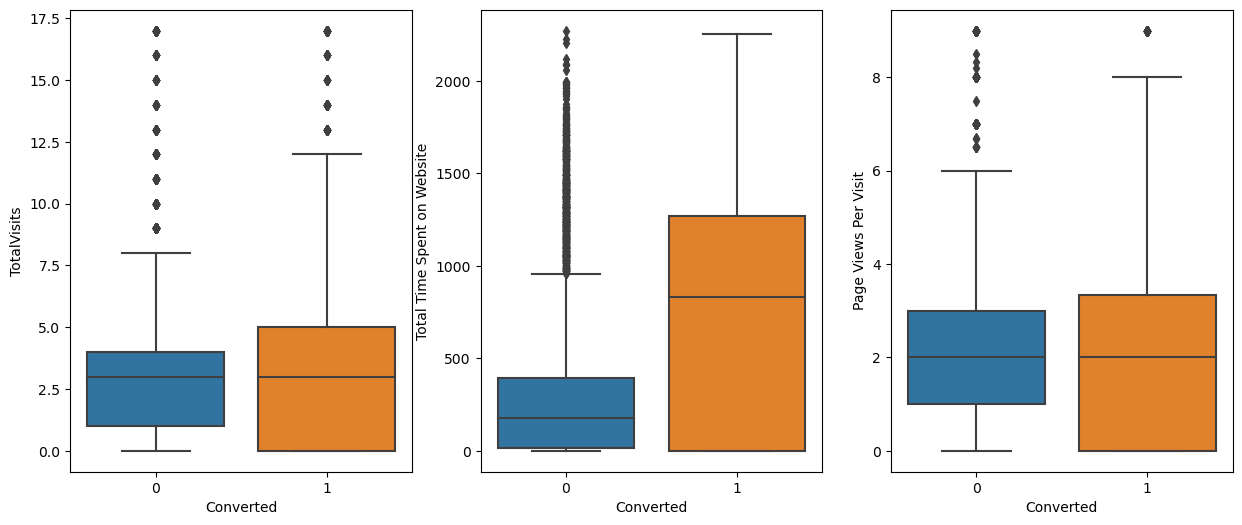

In [155]:
#bivariate analysis of continuous columns

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y =lead["TotalVisits"],x= lead['Converted']);
plt.subplot(1,3,2)
sns.boxplot(y=lead["Total Time Spent on Website"],x= lead['Converted']);
plt.subplot(1,3,3)
sns.boxplot(y =lead["Page Views Per Visit"],x= lead['Converted']);




OBSERVATION:
1) The median of both the conversion and non-conversion are same for total visits
2) Users spending more time on the website are more likely to get converted
3) the median and 75 pecentile for the page views is almost same, hence no insights can be drawn from this chart

# Dummy Variable Creation

In [156]:
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']],drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead_Origin_Others,Lead Source_Google,Lead Source_Lead_Source_Others,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Last_Activity_Others,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Last_Notable_Activity_Others,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [157]:
dummy.shape

(9240, 23)

In [158]:
# Creating dummy variables for the variable 'What matters most to you in choosing a course new'
Course_selection= pd.get_dummies(lead["What matters most to you in choosing a course"], prefix='Course_selection')
Course_selection.head()

,Course_selection_Better Career Prospects,Course_selection_Course_choice_Others,Course_selection_Missing
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [159]:
Course_selection.drop('Course_selection_Missing',axis=1,inplace=True)
Course_selection.head()

,Course_selection_Better Career Prospects,Course_selection_Course_choice_Others
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [160]:
# Creating dummy variables for the variable 'What is your current occupation'
current_occupation= pd.get_dummies(lead['What is your current occupation'], prefix='current_occupation')
current_occupation.head()


,current_occupation_Missing,current_occupation_Occupation_Others,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [161]:
current_occupation.drop('current_occupation_Missing',axis=1,inplace=True)
current_occupation.head()

,current_occupation_Occupation_Others,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [162]:
# Creating dummy variables for the variable 'Specialization'
Specialization= pd.get_dummies(lead['Specialization'], prefix='Specialization')
Specialization.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [163]:
Specialization.drop('Specialization_Missing',axis=1,inplace=True)
Specialization.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [164]:
# Creating dummy variables for the variable 'Tags'
Tags= pd.get_dummies(lead['Tags'], prefix='Tags')
Tags.head()

,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Missing,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0


In [165]:
Tags.drop('Tags_Missing',axis=1,inplace=True)
Tags.head()

,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0


In [166]:
lead = pd.concat([lead,dummy],axis=1)
lead = pd.concat([lead,Course_selection],axis=1)
lead = pd.concat([lead,current_occupation],axis=1)
lead = pd.concat([lead,Tags],axis=1)
lead = pd.concat([lead,Specialization],axis=1)
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead_Origin_Others,Lead Source_Google,Lead Source_Lead_Source_Others,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Last_Activity_Others,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Last_Notable_Activity_Others,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Course_selection_Better Career Prospects,Course_selection_Course_choice_Others,current_occupation_Occupation_Others,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Better Career Prospects,Interested in other courses,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Missing,Unemployed,Better Career Prospects,Ringing,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Last_Activity_Others,Media and Advertising,Unemployed,Better Career Prospects,Ringing,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,Better Career Prospects,Will revert after reading the email,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
lead.shape

(9240, 62)

In [168]:
lead.drop(["Lead Origin","Last Activity","Last Notable Activity","Specialization","What is your current occupation","What matters most to you in choosing a course","Tags","Lead Source"],axis=1,inplace=True)

In [169]:
lead.shape

(9240, 54)

In [170]:
#checking for outliers in continuous columns

num_cols = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

num_cols.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.327814,487.698268,2.329050
std,3.228466,548.021466,1.971347
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


# Splitting into Train-Test dataset

In [171]:
# Putting feature variable to X
X = lead.drop(['Converted'], axis=1)
# Putting response variable to y
y = lead['Converted']

print(y.head(10))
X.head()

0    0
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    0
9    0
Name: Converted, dtype: int64


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead_Origin_Others,Lead Source_Google,Lead Source_Lead_Source_Others,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Last_Activity_Others,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Last_Notable_Activity_Others,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Course_selection_Better Career Prospects,Course_selection_Course_choice_Others,current_occupation_Occupation_Others,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# Feature Scaling

In [173]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead_Origin_Others,Lead Source_Google,Lead Source_Lead_Source_Others,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Last_Activity_Others,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Last_Notable_Activity_Others,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Course_selection_Better Career Prospects,Course_selection_Course_choice_Others,current_occupation_Occupation_Others,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4715,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7132,0.117647,0.549296,0.111111,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8954,0.235294,0.170335,0.147778,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
5283,1.000000,0.532130,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3003,0.176471,0.595951,0.333333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# checking the correlation

In [174]:
#finding the top 10 correlation among the given column

correlation = lead.corr()

# Unstacking the correlation matrix to find out top correlations
correlation_unstacked = correlation.unstack().sort_values()

correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form                 Lead Source_Reference                            0.853237
Last Activity_SMS Sent                    Last Notable Activity_SMS Sent                   0.852707
Last Activity_Email Opened                Last Notable Activity_Email Opened               0.842496
Course_selection_Better Career Prospects  current_occupation_Unemployed                    0.798003
Lead Origin_Lead_Origin_Others            Lead Source_Lead_Source_Others                   0.790634
TotalVisits                               Page Views Per Visit                             0.706203
Last Activity_Page Visited on Website     Last Notable Activity_Page Visited on Website    0.692057
Converted                                 Tags_Will revert after reading the email         0.644307
A free copy of Mastering The Interview    Lead Origin_Landing Page Submission              0.569633
Page Views Per Visit                      Lead Origin_Landing Page Submission              0.520359


*In the above output we see top 10 correlations, we will let the RFE to select the columns at initial stage, hence not taking actions related to correlation here*

# Feature selection using RFE

In [175]:
# Selecting 15 features using by RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select= 20)  
rfe = rfe.fit(X_train, y_train)

In [176]:
rfe.support_

array([False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False,  True,  True,  True, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False])

In [177]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead_Origin_Others', False, 30),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Lead_Source_Others', False, 14),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Last_Activity_Others', False, 6),
 ('Last Activity_Olark Chat Conversation', False, 23),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Email Opened', False, 31),
 ('Last Notable 

In [178]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Last Notable Activity_Last_Notable_Activity_Others',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent',
       'Course_selection_Better Career Prospects', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off'],
      dtype='object')

# Model 1

In [179]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.1
Date:                Tue, 21 Nov 2023   Deviance:                       2238.2
Time:                        12:10:41   Pearson chi2:                 9.72e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6269
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -2.7516      0.144    -19.161      0.000      -3.033      -2.470
Total Time Spent on Website                            3.9332      0.248     15.860      0.000       3.447       4.419
Page Views Per Visit                                  -1.2348      0.295     -4.185      0.000      -1.813      -0.657
Lead Origin_Lead Add Form                              0.2629      0.339      0.775      0.438      -0.402       0.928
Lead Source_Welingak Website                          23.0313   1.29e+04      0.002      0.999   -2.53e+04    2.53e+04
Last Activity_Email Bounced                           -1.8405      0.450     -4.094      0.000      -2.722      -0.959
Last Activity_SMS Sent                                 1.4754      0.232      6.348      0.000       1.020       1.931
Last Notable Activity_Last_Notable_Activity_Others     1.2895      0.440      2.928      0.003       0.426       2.153
Last Notable Activity_Modified                        -1.0687      0.162     -6.599      0.000      -1.386      -0.751
Last Notable Activity_Olark Chat Conversation         -1.9134      0.486     -3.938      0.000      -2.866      -0.961
Last Notable Activity_SMS Sent                         0.7966      0.269      2.957      0.003       0.269       1.325
Course_selection_Better Career Prospects               2.6321      0.159     16.571      0.000       2.321       2.943
Tags_Already a student                                -4.9807      0.603     -8.259      0.000      -6.163      -3.799
Tags_Busy                                             -1.3880      0.259     -5.356      0.000      -1.896      -0.880
Tags_Closed by Horizzon                                4.8418      0.746      6.486      0.000       3.379       6.305
Tags_Interested in other courses                      -3.7965      0.388     -9.775      0.000      -4.558      -3.035
Tags_Lost to EINS                                      5.5435      0.662      8.374      0.000       4.246       6.841
Tags_Others                                           -3.9289      0.284    -13.821      0.000      -4.486      -3.372
Tags_Ringing                                          -5.2279      0.270    -19.371      0.000      -5.757      -4.699
Tags_Will revert after reading the email               2.6341      0.214     12.334      0.000       2.216       3.053
Tags_switched off                                     -6.3033      0.747     -8.436      0.000      -7.768      -4.839
======================================================================================================================
"""

In [180]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Course_selection_Better Career Prospects,10.43
9,Last Notable Activity_SMS Sent,6.08
5,Last Activity_SMS Sent,5.88
18,Tags_Will revert after reading the email,4.11
17,Tags_Ringing,2.76
1,Page Views Per Visit,2.56
0,Total Time Spent on Website,2.28
16,Tags_Others,2.04
7,Last Notable Activity_Modified,1.88
14,Tags_Interested in other courses,1.77


In [181]:
col = col.drop('Lead Source_Welingak Website',1)

# model 2

In [182]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1130.2
Date:                Tue, 21 Nov 2023   Deviance:                       2260.3
Time:                        12:10:41   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6256
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -2.7489      0.143    -19.189      0.000      -3.030      -2.468
Total Time Spent on Website                            3.9335      0.248     15.865      0.000       3.448       4.419
Page Views Per Visit                                  -1.2154      0.293     -4.141      0.000      -1.791      -0.640
Lead Origin_Lead Add Form                              1.1102      0.298      3.729      0.000       0.527       1.694
Last Activity_Email Bounced                           -1.9901      0.455     -4.374      0.000      -2.882      -1.098
Last Activity_SMS Sent                                 1.5137      0.231      6.556      0.000       1.061       1.966
Last Notable Activity_Last_Notable_Activity_Others     1.3252      0.440      3.009      0.003       0.462       2.188
Last Notable Activity_Modified                        -1.1005      0.161     -6.821      0.000      -1.417      -0.784
Last Notable Activity_Olark Chat Conversation         -1.9448      0.484     -4.018      0.000      -2.893      -0.996
Last Notable Activity_SMS Sent                         0.7487      0.268      2.797      0.005       0.224       1.273
Course_selection_Better Career Prospects               2.7221      0.158     17.177      0.000       2.411       3.033
Tags_Already a student                                -5.0735      0.603     -8.413      0.000      -6.255      -3.892
Tags_Busy                                             -1.4858      0.258     -5.752      0.000      -1.992      -0.979
Tags_Closed by Horizzon                                4.4592      0.733      6.086      0.000       3.023       5.895
Tags_Interested in other courses                      -3.8876      0.388    -10.019      0.000      -4.648      -3.127
Tags_Lost to EINS                                      5.5669      0.670      8.313      0.000       4.254       6.879
Tags_Others                                           -4.0267      0.284    -14.197      0.000      -4.583      -3.471
Tags_Ringing                                          -5.3510      0.269    -19.917      0.000      -5.878      -4.824
Tags_Will revert after reading the email               2.4356      0.205     11.869      0.000       2.033       2.838
Tags_switched off                                     -6.3939      0.747     -8.558      0.000      -7.858      -4.929
======================================================================================================================
"""

In [183]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Course_selection_Better Career Prospects,9.99
8,Last Notable Activity_SMS Sent,6.08
4,Last Activity_SMS Sent,5.88
17,Tags_Will revert after reading the email,3.84
16,Tags_Ringing,2.67
1,Page Views Per Visit,2.56
0,Total Time Spent on Website,2.28
15,Tags_Others,1.99
6,Last Notable Activity_Modified,1.88
13,Tags_Interested in other courses,1.73


In [184]:
col = col.drop('Course_selection_Better Career Prospects',1)

# model 3

In [185]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1297.3
Date:                Tue, 21 Nov 2023   Deviance:                       2594.6
Time:                        12:10:41   Pearson chi2:                 9.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6058
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -1.7262      0.110    -15.740      0.000      -1.941      -1.511
Total Time Spent on Website                            3.9404      0.229     17.234      0.000       3.492       4.388
Page Views Per Visit                                  -1.6918      0.277     -6.113      0.000      -2.234      -1.149
Lead Origin_Lead Add Form                              2.1807      0.278      7.853      0.000       1.636       2.725
Last Activity_Email Bounced                           -1.5101      0.450     -3.358      0.001      -2.392      -0.629
Last Activity_SMS Sent                                 1.2439      0.216      5.763      0.000       0.821       1.667
Last Notable Activity_Last_Notable_Activity_Others     1.0898      0.423      2.575      0.010       0.260       1.919
Last Notable Activity_Modified                        -1.3418      0.150     -8.958      0.000      -1.635      -1.048
Last Notable Activity_Olark Chat Conversation         -1.6492      0.435     -3.789      0.000      -2.502      -0.796
Last Notable Activity_SMS Sent                         0.9042      0.251      3.598      0.000       0.412       1.397
Tags_Already a student                                -3.2257      0.594     -5.435      0.000      -4.389      -2.062
Tags_Busy                                              0.5015      0.228      2.201      0.028       0.055       0.948
Tags_Closed by Horizzon                                6.2128      0.727      8.549      0.000       4.788       7.637
Tags_Interested in other courses                      -1.9637      0.370     -5.308      0.000      -2.689      -1.239
Tags_Lost to EINS                                      5.7864      0.612      9.452      0.000       4.586       6.986
Tags_Others                                           -2.0947      0.256     -8.195      0.000      -2.596      -1.594
Tags_Ringing                                          -3.4891      0.237    -14.709      0.000      -3.954      -3.024
Tags_Will revert after reading the email               4.3195      0.180     24.027      0.000       3.967       4.672
Tags_switched off                                     -4.4392      0.735     -6.037      0.000      -5.880      -2.998
======================================================================================================================
"""

In [186]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_SMS Sent,6.00
4,Last Activity_SMS Sent,5.88
1,Page Views Per Visit,2.53
0,Total Time Spent on Website,2.22
16,Tags_Will revert after reading the email,1.89
6,Last Notable Activity_Modified,1.87
2,Lead Origin_Lead Add Form,1.41
11,Tags_Closed by Horizzon,1.32
15,Tags_Ringing,1.29
3,Last Activity_Email Bounced,1.20


In [187]:
col =col.drop('Last Notable Activity_SMS Sent',1)

# Model 4

In [188]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1303.9
Date:                Tue, 21 Nov 2023   Deviance:                       2607.7
Time:                        12:10:41   Pearson chi2:                 9.81e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6050
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -1.6306      0.105    -15.546      0.000      -1.836      -1.425
Total Time Spent on Website                            3.9318      0.228     17.232      0.000       3.485       4.379
Page Views Per Visit                                  -1.7593      0.274     -6.426      0.000      -2.296      -1.223
Lead Origin_Lead Add Form                              2.1645      0.276      7.836      0.000       1.623       2.706
Last Activity_Email Bounced                           -1.3564      0.453     -2.996      0.003      -2.244      -0.469
Last Activity_SMS Sent                                 1.9049      0.113     16.850      0.000       1.683       2.126
Last Notable Activity_Last_Notable_Activity_Others     0.9416      0.422      2.233      0.026       0.115       1.768
Last Notable Activity_Modified                        -1.6803      0.123    -13.689      0.000      -1.921      -1.440
Last Notable Activity_Olark Chat Conversation         -1.7459      0.437     -3.998      0.000      -2.602      -0.890
Tags_Already a student                                -3.2772      0.594     -5.519      0.000      -4.441      -2.113
Tags_Busy                                              0.5294      0.224      2.364      0.018       0.090       0.968
Tags_Closed by Horizzon                                6.3904      0.728      8.776      0.000       4.963       7.818
Tags_Interested in other courses                      -1.9374      0.369     -5.246      0.000      -2.661      -1.214
Tags_Lost to EINS                                      5.9570      0.615      9.692      0.000       4.752       7.162
Tags_Others                                           -2.0291      0.252     -8.051      0.000      -2.523      -1.535
Tags_Ringing                                          -3.3796      0.232    -14.550      0.000      -3.835      -2.924
Tags_Will revert after reading the email               4.3996      0.182     24.159      0.000       4.043       4.756
Tags_switched off                                     -4.3241      0.733     -5.899      0.000      -5.761      -2.888
======================================================================================================================
"""

In [189]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit,2.53
0,Total Time Spent on Website,2.21
15,Tags_Will revert after reading the email,1.84
4,Last Activity_SMS Sent,1.56
6,Last Notable Activity_Modified,1.53
2,Lead Origin_Lead Add Form,1.41
10,Tags_Closed by Horizzon,1.32
14,Tags_Ringing,1.27
3,Last Activity_Email Bounced,1.18
13,Tags_Others,1.16


In [190]:
#Getting the predicted values for the training set

y_train_pred = res.predict(X_train_sm)

In [191]:
y_train_pred.head()

4715    0.163748
7132    0.991279
8954    0.063237
5283    0.034664
3003    0.586795
dtype: float64

In [192]:
y_train_pred.shape

(6468,)

In [193]:
y_train_pred = y_train_pred.values.reshape(-1)

In [194]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.163748,4715
1,1,0.991279,7132
2,0,0.063237,8954
3,0,0.034664,5283
4,0,0.586795,3003


In [195]:
y_train_pred_final.shape

(6468, 3)

In [196]:
y_train

4715    0
7132    1
8954    0
5283    0
3003    0
478     0
1352    1
3166    1
7700    0
2647    0
7420    1
4782    1
4331    1
3122    0
1033    0
3817    1
5927    0
2598    1
5504    0
3704    0
7826    0
3370    1
4717    1
3590    1
4794    1
1425    1
4562    0
1871    0
480     0
8869    0
5652    0
527     0
722     1
4328    0
3574    0
220     1
8479    1
5350    0
4022    1
2874    0
3133    0
8234    1
5007    1
7887    1
2995    0
3942    1
8874    1
5118    0
2391    0
3248    1
7256    0
1983    1
8654    0
1554    0
8394    1
3349    0
8775    0
7160    0
5027    1
1677    0
6087    0
4870    0
901     1
6033    0
2296    1
6312    0
296     0
8037    0
57      1
6125    1
8267    1
7356    1
5650    0
2676    1
6100    0
5667    0
4469    0
6480    1
295     0
2580    1
5103    0
3519    1
648     0
1370    1
9104    1
9105    1
6884    1
6361    1
3859    0
6908    0
681     0
434     0
4738    1
8356    0
1489    0
812     0
1882    1
8531    0
4161    0
3205    0


In [197]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [198]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

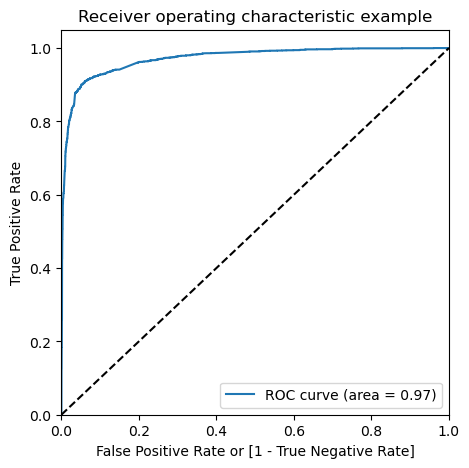

In [199]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Finding the optimum cut-off probability using sensitivity-Specificity 

In [200]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.163748,4715,1,1,0,0,0,0,0,0,0,0
1,1,0.991279,7132,1,1,1,1,1,1,1,1,1,1
2,0,0.063237,8954,1,0,0,0,0,0,0,0,0,0
3,0,0.034664,5283,1,0,0,0,0,0,0,0,0,0
4,0,0.586795,3003,1,1,1,1,1,1,0,0,0,0


In [201]:
#Calculating the accuracy, sensitivity and specificity for different probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.817254  0.973833  0.719629
0.2   0.2  0.905071  0.929952  0.889558
0.3   0.3  0.922233  0.917069  0.925452
0.4   0.4  0.927798  0.909420  0.939257
0.5   0.5  0.928726  0.891707  0.951807
0.6   0.6  0.919913  0.837762  0.971135
0.7   0.7  0.911255  0.801127  0.979920
0.8   0.8  0.901670  0.770531  0.983434
0.9   0.9  0.885127  0.718599  0.988956


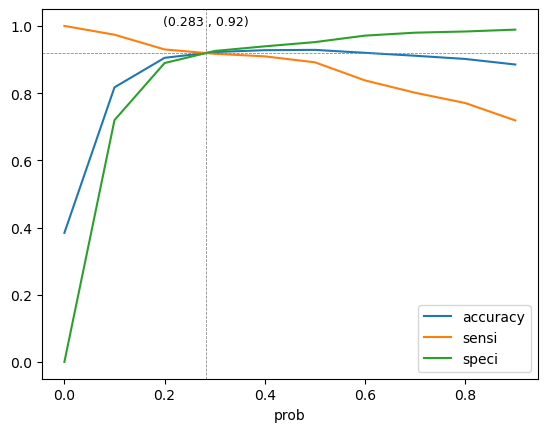

In [202]:
# Finding the intersection points of the sensitivity and accuracy curves
sensi_interpolation = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interpolation = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interpolation(x) - acc_interpolation(x), 0.3)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interpolation = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interpolation(x) - acc_interpolation(x), 0.3)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interpolation(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interpolation(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interpolation(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

In [203]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.283 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.163748,4715,1,1,0,0,0,0,0,0,0,0,0
1,1,0.991279,7132,1,1,1,1,1,1,1,1,1,1,1
2,0,0.063237,8954,1,0,0,0,0,0,0,0,0,0,0
3,0,0.034664,5283,1,0,0,0,0,0,0,0,0,0,0
4,0,0.586795,3003,1,1,1,1,1,1,0,0,0,0,1


In [204]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [205]:
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,predicted,Lead_Score
0,0,0.163748,4715,0,16
1,1,0.991279,7132,1,99
2,0,0.063237,8954,0,6
3,0,0.034664,5283,0,3
4,0,0.586795,3003,1,59


In [206]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3679  305]
 [ 204 2280]]


In [207]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9213048855905999


In [208]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [209]:
# Sensitivity of the logistic regression model
sensitivity= round(TP / float(TP+FN),4)
print("Sensitivity of train data:",sensitivity)
specificity=round(TN / float(TN+FP),4)
# Specificity of our Logistic regression model
print("Specificity of train data:",specificity)

Sensitivity of train data: 0.9179
Specificity of train data: 0.9234


In [210]:
# Calculate false postive rate
FPR=round(FP/ float(TN+FP),4)
print("False positive rate of Train Data:", FPR)

False positive rate of Train Data: 0.0766


In [211]:
# Precision of train data
precision = round(TP/(TP+FP),4)
print("Precision of Train Data:", precision)
# Recall of train data
recall = round(TP/(TP+FN),4)
print("Recall of Train Data:", recall)

Precision of Train Data: 0.882
Recall of Train Data: 0.9179


In [212]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       0
 5       0
 6       1
 7       1
 8       0
 9       0
 10      1
 11      1
 12      1
 13      0
 14      0
 15      1
 16      0
 17      1
 18      0
 19      0
 20      0
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      0
 28      0
 29      0
 30      0
 31      0
 32      1
 33      0
 34      0
 35      1
 36      1
 37      0
 38      1
 39      0
 40      0
 41      1
 42      1
 43      1
 44      0
 45      1
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      0
 53      0
 54      1
 55      0
 56      0
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      0
 67      0
 68      1
 69      1
 70      1
 71      1
 72      0
 73      1
 74      0
 75      0
 76      0
 77      1
 78      0
 79      1
 80      0
 81      1
 82      0
 83      1
 84      1
 85      1
 86      1
 87      1
 88      0
 89      0
 90      0

# Precison and Recall Tradeoff

In [213]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

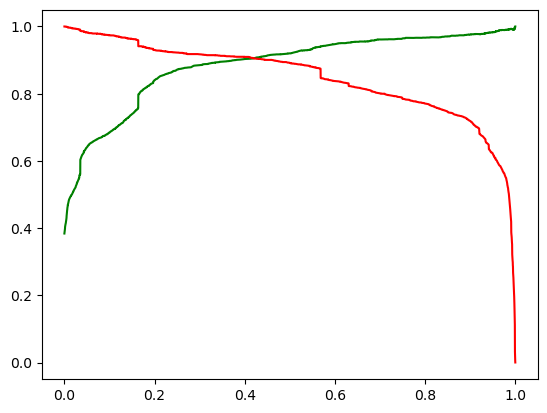

In [214]:
# Precison and Recall Tradeoff

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [215]:
# Now let's calculate accuracy, sensitivity, specificity, precision, and recall for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy','precision', 'recall'])
from sklearn.metrics import confusion_matrix

# Assuming you have y_train_pred_final with columns 'Converted' and other probability columns
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    precision = cm1[1, 1] / (cm1[0, 1] + cm1[1, 1])  # Precision = TP / (TP + FP)
    recall = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    cutoff_df.loc[i] = [i, accuracy, precision, recall]

print(cutoff_df)


     prob  accuracy  precision    recall
0.0   0.0  0.384045   0.384045  1.000000
0.1   0.1  0.817254   0.684106  0.973833
0.2   0.2  0.905071   0.840000  0.929952
0.3   0.3  0.922233   0.884660  0.917069
0.4   0.4  0.927798   0.903239  0.909420
0.5   0.5  0.928726   0.920233  0.891707
0.6   0.6  0.919913   0.947632  0.837762
0.7   0.7  0.911255   0.961353  0.801127
0.8   0.8  0.901670   0.966667  0.770531
0.9   0.9  0.885127   0.975943  0.718599


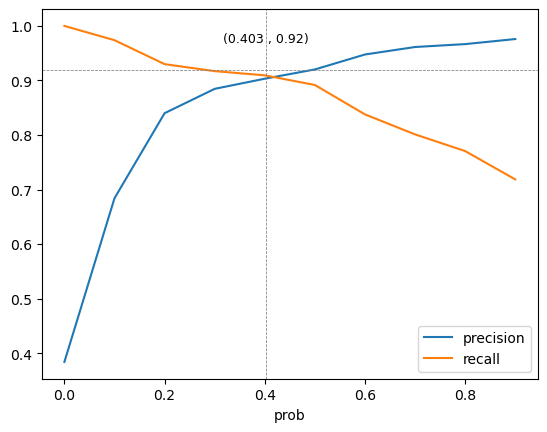

In [218]:
# Finding the intersection points of the precision and accuracy curves
precision_interpolation = interp1d(cutoff_df['prob'], cutoff_df['precision'], kind='linear')
intersection_3 = np.round(float(fsolve(lambda x: precision_interpolation(x) - acc_interpolation(x), 0.3)), 3)

# Finding the intersection points of the recall and accuracy curves
recall_interpolation = interp1d(cutoff_df['prob'], cutoff_df['recall'], kind='linear')
intersection_4 = np.round(float(fsolve(lambda x: recall_interpolation(x) - acc_interpolation(x), 0.3)), 3)

# Calculate the average of the two intersection points
intersection_x_recall_precision = (intersection_3 + intersection_4) / 2

# Interpolate the accuracy, precision, and recall at the intersection point
precision_at_intersection = np.round(float(precision_interpolation(intersection_x_recall_precision)), 2)
recall_at_intersection = np.round(float(recall_interpolation(intersection_x_recall_precision)), 2)

# Plot the four curves and add vertical and horizontal lines at the intersection point
cutoff_df.plot.line(x='prob', y=['precision', 'recall'])
plt.axvline(x=intersection_x_recall_precision, color='grey', linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey', linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x_recall_precision} , {accuracy_at_intersection})',
             xy=(intersection_x_recall_precision, accuracy_at_intersection),
             xytext=(0, 20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


In [219]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.403 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead_Score
0,0,0.163748,4715,1,1,0,0,0,0,0,0,0,0,0,16
1,1,0.991279,7132,1,1,1,1,1,1,1,1,1,1,1,99
2,0,0.063237,8954,1,0,0,0,0,0,0,0,0,0,0,6
3,0,0.034664,5283,1,0,0,0,0,0,0,0,0,0,0,3
4,0,0.586795,3003,1,1,1,1,1,1,0,0,0,0,1,59


In [220]:
# Confusion matrix 
confusion_pr = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_pr)

[[3743  241]
 [ 225 2259]]


In [221]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9279529993815708


In [222]:
TP = confusion_pr[1,1] # true positive 
TN = confusion_pr[0,0] # true negatives
FP = confusion_pr[0,1] # false positives
FN = confusion_pr[1,0] # false negatives

In [223]:
# Sensitivity of the logistic regression model
sensitivity= round(TP / float(TP+FN),4)
print("Sensitivity of train data:",sensitivity)
specificity=round(TN / float(TN+FP),4)
# Specificity of the Logistic regression model
print("Specificity of train data:",specificity)

Sensitivity of train data: 0.9094
Specificity of train data: 0.9395


In [224]:
# Calculate false postive rate 
FPR=round(FP/ float(TN+FP),4)
print("False positive rate of Train Data:", FPR)

False positive rate of Train Data: 0.0605


In [225]:
# Lets calculate Precision of train data
precision = round(TP/(TP+FP),4)
print("Precision of Train Data:", precision)
# lets calculate recall of train data
recall = round(TP/(TP+FN),4)
print("Recall of Train Data:", recall)

Precision of Train Data: 0.9036
Recall of Train Data: 0.9094


**For the given problem statement sensitivity/Recall are important, hence we choose 0.283 cut off since with it our sensitivity/recall are maximum**

# Predictions on the test data-set 

In [226]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_test.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead_Origin_Others,Lead Source_Google,Lead Source_Lead_Source_Others,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Last_Activity_Others,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Last_Notable_Activity_Others,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Course_selection_Better Career Prospects,Course_selection_Course_choice_Others,current_occupation_Occupation_Others,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4608,0.470588,0.110915,0.296667,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7935,0.117647,0.408891,0.222222,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4043,0.058824,0.000880,0.111111,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7821,0.117647,0.142165,0.222222,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
856,0.176471,0.088468,0.333333,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
927,0.176471,0.170775,0.166667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
318,0.294118,0.676056,0.555556,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1018,0.411765,0.096391,0.258889,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8151,0.117647,0.010563,0.222222,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1570,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [227]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Last_Notable_Activity_Others,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4608,0.110915,0.296667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7935,0.408891,0.222222,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4043,0.000880,0.111111,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7821,0.142165,0.222222,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
856,0.088468,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [228]:
X_test_sm = sm.add_constant(X_test)

In [229]:
y_test_pred = res.predict(X_test_sm)

In [230]:
#converting the y_test_pred into DF

y_test_pred = pd.DataFrame(y_test_pred)

In [231]:
y_test_df = pd.DataFrame(y_test)

In [232]:
y_test_df['Prospect ID'] = y_test_df.index

In [233]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [234]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [235]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4608,0.990752
1,0,7935,0.030752
2,0,4043,0.007696
3,0,7821,0.007828
4,0,856,0.133635


In [236]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [237]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4608,1,0.990752
1,7935,0,0.030752
2,4043,0,0.007696
3,7821,0,0.007828
4,856,0,0.133635


In [238]:
y_pred_final['Prediction'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.283 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Prediction
0,4608,1,0.990752,1
1,7935,0,0.030752,0
2,4043,0,0.007696,0
3,7821,0,0.007828,0
4,856,0,0.133635,0


In [239]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Prediction,Lead_Score
0,4608,1,0.990752,1,99
1,7935,0,0.030752,0,3
2,4043,0,0.007696,0,1
3,7821,0,0.007828,0,1
4,856,0,0.133635,0,13


In [240]:
#Accuracy of the model.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Prediction)

0.920995670995671

In [241]:
#confuson matrix

confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Prediction )
confusion

array([[1558,  137],
       [  82,  995]], dtype=int64)

In [242]:
TP_test = confusion[1,1] # true positive 
TN_test = confusion[0,0] # true negatives
FP_test = confusion[0,1] # false positives
FN_test = confusion[1,0] # false negatives

In [243]:
#Sensitivity
sensitivity_test= round(TP_test / float(TP_test+FN_test),4)
print("Sensitivity of test data:",sensitivity_test)
specificity_test=round(TN_test / float(TN_test+FP_test),4)
#Specificity
print("Specificity of test data:",specificity_test)

Sensitivity of test data: 0.9239
Specificity of test data: 0.9192


In [244]:
#False-Positive_Rate

FPR_test=round(FP_test/ float(TN_test+FP_test),4)
print("False positive rate of Test Data:", FPR_test)

False positive rate of Test Data: 0.0808


In [245]:
# Precision
precision_test = round(TP_test/(TP_test+FP_test),4)
print("Precision of Test Data:", precision_test)
# Recall
recall_test = round(TP_test/(TP_test+FN_test),4)
print("Recall of Test Data:", recall_test)

Precision of Test Data: 0.879
Recall of Test Data: 0.9239


In [246]:
print("Sensitivity/Recall :",sensitivity_test)
print("Specificity :",specificity_test)
print("precision :",precision_test)
print("False-Positive_Rate :",FPR_test)


Sensitivity/Recall : 0.9239
Specificity : 0.9192
precision : 0.879
False-Positive_Rate : 0.0808
